# Trabajo Práctico 4 - Machine Learning
*Felicitas marolda*

## Parte 1: Clustering de datos
Para el dataset clustering.csv realizar los siguientes análisis:

a) Implementar el algoritmo K-means y determinar la cantidad de clusters con el método de
“ganancias decrecientes” (graficar L vs. K, y elegir un valor K donde al aumentar K deje
de reducir significativamente L, donde L es la suma de las distancias). Graficar el conjunto
de datos xi mostrando a qué cluster pertenece cada dato (usando colores/marcadores
distintos para cada cluster) y también mostrar el centroide de cada cluster.

In [1]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

import src.algoritmos as alg
import src.auxiliares as aux

In [2]:
np.random.seed(241204)

In [3]:
# cargamos datasets
clustering_csv = pd.read_csv('data/clustering.csv')
mnist_csv = pd.read_csv('data/MNIST_dataset.csv')

# drop primera columna
clustering_csv = clustering_csv.drop(clustering_csv.columns[0], axis=1)


In [4]:
# pasamos a numpy
clustering = clustering_csv.values
mnist = mnist_csv.values

In [42]:
importlib.reload(alg)
importlib.reload(aux)

k_values = range(1,30)

distances_k = []
k_info = {}
for k in k_values:
    centroids, labels = alg.k_means(clustering, k)
    distances = aux.get_distances_sum(clustering, labels, centroids)
    k_info[k] = {
        'centroids': centroids,
        'labels': labels,
        'distances': distances
    }
    distances_k.append(distances)

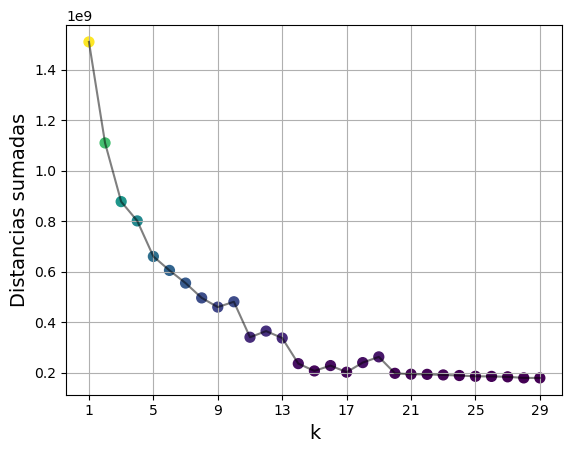

In [44]:
importlib.reload(aux)
aux.graph(k_values, distances_k, 'k', 'Distancias sumadas')

Vemos como se ven las proyecciones en 7, 11 y 17

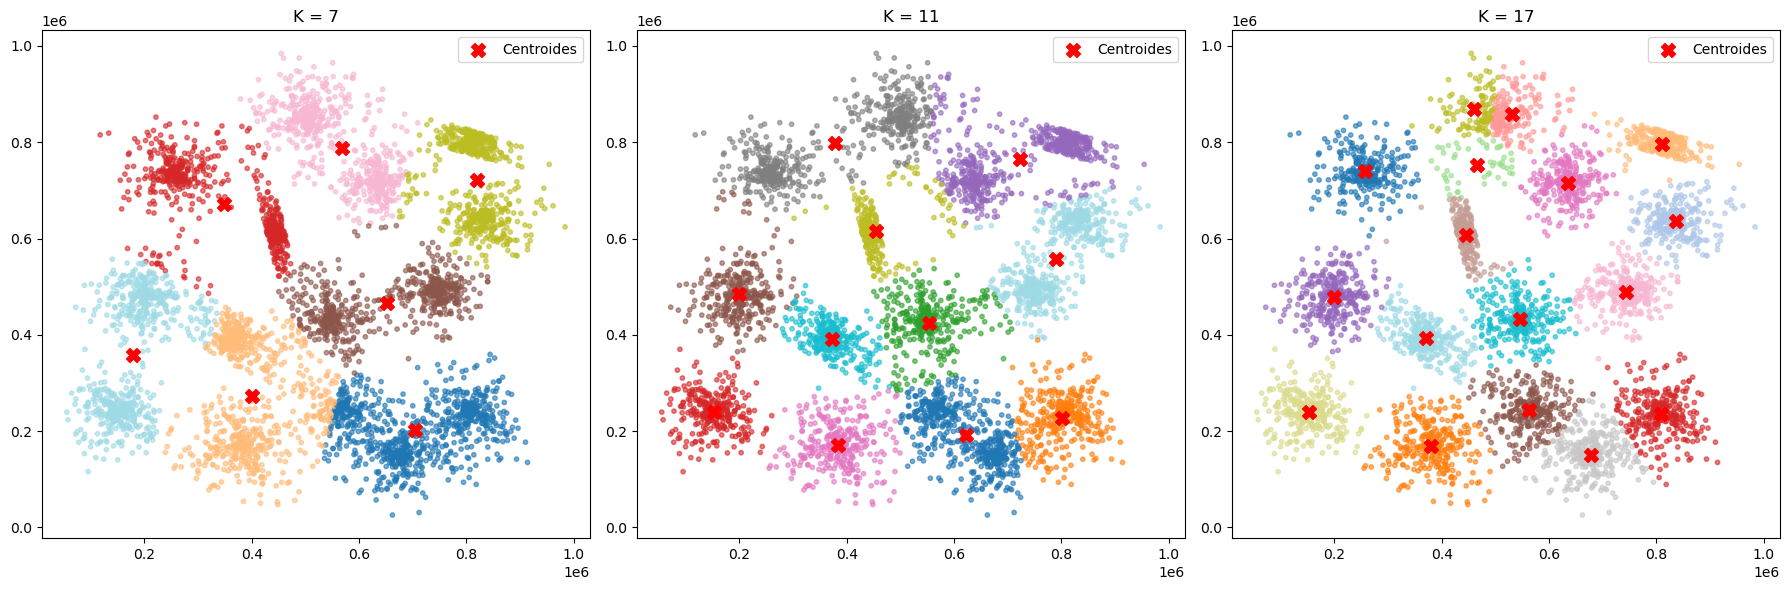

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for idx, k in enumerate([7, 11, 17]):
    labels_k = k_info[k]['labels']
    centroids_k = k_info[k]['centroids']
    axs[idx].scatter(clustering[:, 0], clustering[:, 1], c=labels_k, cmap='tab20', s=10, alpha=0.6)
    axs[idx].scatter(centroids_k[:, 0], centroids_k[:, 1], c='red', marker='X', s=100, label='Centroides')
    axs[idx].set_title(f'K = {k}')
    axs[idx].legend()

plt.tight_layout()
plt.show()

b) Implementar el algoritmo Gaussian Mixture Model (GMM) y realizar la misma tarea que
en el inciso anterior. Recuerde que puede inicializar la optimización de GMM con una
corrida de K-means.

In [81]:
importlib.reload(alg)
importlib.reload(aux)

k_possible = range(1,20,2)
distances_k_gmm = []
k_info_gmm = {}
for k in k_possible:
    print(f'k = {k}')
    medias, covs, weights, responsabilidades, log_like_hist, labels_gmm = alg.GMM(
        clustering,
        k=k,
        centroids_init=k_info[k]['centroids'],
    )
    distances = aux.get_distances_sum(clustering, labels_gmm, medias)
    k_info_gmm[k] = {
        'centroids': medias,
        'covs': covs,
        'weights': weights,
        'responsabilidades': responsabilidades,
        'log_like_hist': log_like_hist,
        'labels_gmm': labels_gmm
    }
    distances_k_gmm.append(distances)

k = 1
k = 3
k = 5
k = 7
k = 9
k = 11
k = 13
k = 15
k = 17
k = 19


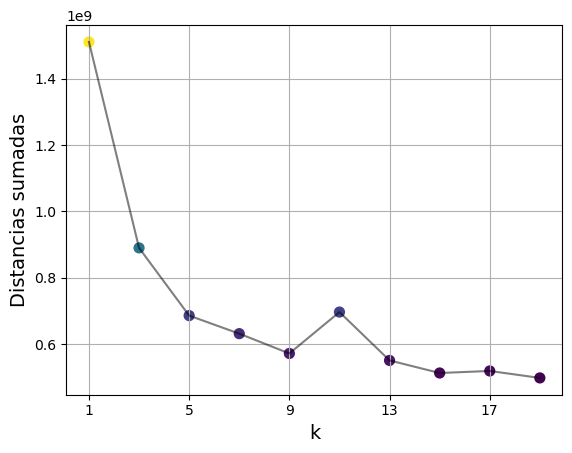

In [82]:
importlib.reload(aux)
aux.graph(k_possible, distances_k_gmm, 'k', 'Distancias sumadas')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


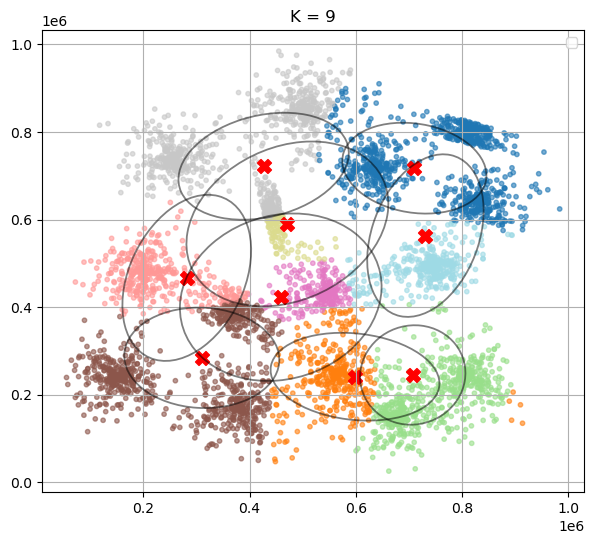

In [83]:
importlib.reload(aux)
k = 9
centroids = k_info_gmm[k]['centroids']
covs = k_info_gmm[k]['covs']
weights = k_info_gmm[k]['weights']
responsabilidades = k_info_gmm[k]['responsabilidades']
log_like_hist = k_info_gmm[k]['log_like_hist']
labels_gmm = k_info_gmm[k]['labels_gmm']

fig,ax = plt.subplots(1, 1, figsize=(7, 6))
ax.scatter(clustering[:, 0], clustering[:, 1], c=labels_gmm, cmap='tab20', s=10, alpha=0.6)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
for i in range(len(centroids)):
    aux.plot_ellipse_transformed(centroids[i], covs[i], ax=ax)
ax.set_title(f'K = {k}')
ax.legend()
plt.grid()
plt.show()

c) Implementar el algoritmo DBSCAN y aplicarlo al conjunto de datos. Explorar el efecto
de variar los parámetros ϵ (radio de la vecindad) y K (mínimo número de puntos en
una zona densa). Luego, elegir una combinación razonable de ϵ y K y graficar los datos
mostrando a qué cluster pertenece cada uno, utilizando colores/marcadores distintos para
cada cluster/ruido.